In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
import re

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%run ./jlu_preprocessing.ipynb
%run ./spk_preprocessing.ipynb

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# data = pd.read_excel(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets.xls')
data = pd.read_csv(r'C:/Users/Checkout/Desktop/SJSU/sem1/257-ML/Project/global_warming_tweets_main.csv', engine='python') #encoding = "cp1252"
data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [4]:
data[data['existence']=="No"].tweet

17      Wait here's an idea: it's natural climate chan...
31      @New_federalists  i have it on good auth tht g...
32      Illegal war and the myth of global warming|My ...
33      the scientific community was scamed by global ...
35      40 degrees in NYC. please urinate on next libe...
                              ...                        
781     Don Blankenship Calls Efforts On Mine Safety R...
1006    Don't be swayed by distraction of climate chan...
1058    Who Cares About Global Warming?: by Jackie Gin...
1071    Don Blankenship Called Safety Regulators "as S...
1072    Coal CEO Calls Mine Safety Rules 'As Silly As ...
Name: tweet, Length: 61, dtype: object

In [5]:
print(data['existence'].value_counts())

Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64


In [6]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data = data.drop_duplicates()
data = data.dropna()
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
print(data.shape)
data.dropna()
data.loc[data['existence'] == np.nan,'existence'] = "No"
print(data['existence'].value_counts())
print(data.shape)
data.head()

(4134, 4)
Yes    3029
No     1105
Name: existence, dtype: int64
(4134, 4)


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [7]:
data['tweet']

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83•_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object

In [8]:
tweets = data["tweet"]
# tweets = tweets.drop_duplicates()
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
3       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
                              ...                        
6084    It's 83•_Á and climbing in NYC. August weather...
6085    @bloodless_coup "The phrase 'global warming' s...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 4134, dtype: object

In [9]:
# tweets[:100]

In [10]:
# python -m spacy download en_core_web_sm
preprocessed_tweets,indices = preprocess_tweets(tweets)

## Modeling

In [20]:
new_data = data.iloc[indices]

In [21]:
prepr_tweets = [" ".join(each) for each in preprocessed_tweets]
new_data['cleaned_tweet'] = prepr_tweets
new_data.head()

,tweet,existence,existence.confidence,word_count,cleaned_tweet
0,Global warming report urges governments to act...,Yes,1.0000,18,hunger global urge face government report warm...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8,africa poverty global warming fight
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12,vatican fail global forest carbon offset warmi...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12,vatican fail global forest carbon offset warmi...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11,tool uruguay climate vulnerable need change


In [22]:
len(prepr_tweets), data.shape, new_data.shape

(3864, (4134, 4), (3864, 5))

In [23]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import collections, numpy

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new_data['cleaned_tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(new_data['cleaned_tweet'].astype('U'))
# print(text_tf)

In [24]:
new_data.isna().sum()

tweet                   0
existence               0
existence.confidence    0
word_count              0
cleaned_tweet           0
dtype: int64

In [25]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.03092895 0.02066514 ... 0.01956744 0.01905638 0.01514051]
 [0.03092895 1.         0.03705285 ... 0.03508466 0.03416833 0.02714712]
 [0.02066514 0.03705285 1.         ... 0.02344177 0.02282952 0.01813831]
 ...
 [0.01956744 0.03508466 0.02344177 ... 1.         0.02161685 0.01717483]
 [0.01905638 0.03416833 0.02282952 ... 0.02161685 1.         0.01672626]
 [0.01514051 0.02714712 0.01813831 ... 0.01717483 0.01672626 1.        ]]


In [26]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (773, 3864)
 Train Data Shape: (3091, 3864)


In [27]:
pos = (y_test == 'Yes').sum()
neg = (y_test == 'No').sum()
postrain = (y_train == 'Yes').sum()
negtrain = (y_train == 'No').sum()
total = pos + neg
print(" Test Data Positive Sentiments :", pos)
print(" Test Data Negative Sentiments :",neg)
print(" Train Data Positive Sentiments :", postrain)
print(" Train Data Positive Sentiments :",negtrain)
new_data['existence'].value_counts()

 Test Data Positive Sentiments : 539
 Test Data Negative Sentiments : 234
 Train Data Positive Sentiments : 2310
 Train Data Positive Sentiments : 781


Yes    2849
No     1015
Name: existence, dtype: int64

In [28]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_score, auc,recall_score, f1_score,roc_curve,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


In [58]:
clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC().fit(X_train, y_train),
    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [59]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


**********SVC***********


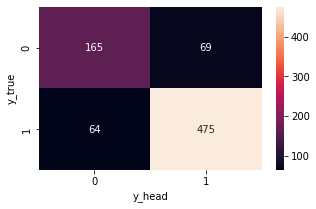


**********DecisionTreeClassifier***********


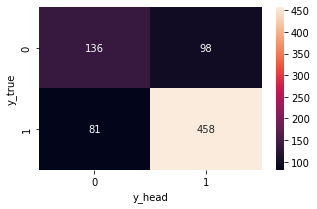


**********KNeighborsClassifier***********


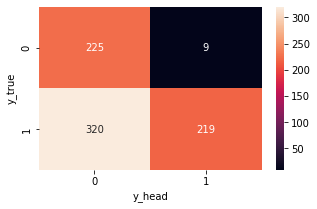

In [60]:
row_index = 0
for clf in clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    MLA_name = clf.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
    MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,new_data['existence'], cv=10).mean()
    plot_conf_matrix(y_test, predicted)
    row_index+=1



In [61]:
print('MLA Precision', round( precision_score(y_test,predicted, average='macro'), 2))
print('MLA Recall', round( recall_score(y_test,predicted, average="macro"), 2))
print('MLA F1 Score', round( f1_score(y_test,predicted, average="macro"), 2))

MLA Precision 0.69
MLA Recall 0.68
MLA F1 Score 0.57


In [62]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.95,0.83,0.87,0.88,0.88,0.17,0.789021
1,DecisionTreeClassifier,0.99,0.77,0.82,0.85,0.84,0.23,0.749140
2,KNeighborsClassifier,0.75,0.57,0.96,0.41,0.57,0.43,0.783593


## Random Under Sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [35]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (773, 3864)
 Train Data Shape: (3091, 3864)


In [36]:
X_train,y_train = RandomUnderSampler(random_state = 21).fit_resample(X_train,y_train)
# X_train,y_train = RandomOverSampler(random_state = 21).fit_resample(X_train,y_train)

In [37]:
X_train.shape, y_train.shape

((1562, 3864), (1562,))

In [38]:
under_MLA_columns = []
under_MLA_compare = pd.DataFrame(columns = under_MLA_columns)

In [39]:
under_clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC(C=0.0001).fit(X_train, y_train),
    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [40]:
row_index = 0
for clf in under_clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    under_MLA_name = clf.__class__.__name__
    under_MLA_compare.loc[row_index,'MLA Name'] = under_MLA_name
    under_MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    under_MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    under_MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    under_MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    under_MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    under_MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
    print('MLA Precision', round( precision_score(y_test,predicted, average="macro"), 2))
    print('MLA Recall', round( recall_score(y_test,predicted, average="macro"), 2))
    print('MLA F1 Score', round( f1_score(y_test,predicted, average="macro"), 2))
    plot_conf_matrix(y_test, predicted)

    under_MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,new_data['existence'], cv=10).mean()
    row_index+=1



**********SVC***********
MLA Precision 0.74
MLA Recall 0.78
MLA F1 Score 0.75

**********DecisionTreeClassifier***********
MLA Precision 0.67
MLA Recall 0.7
MLA F1 Score 0.67

**********KNeighborsClassifier***********
MLA Precision 0.69
MLA Recall 0.72
MLA F1 Score 0.68


In [63]:
under_MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
under_MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.94,0.77,0.90,0.74,0.82,0.23,0.789021
2,KNeighborsClassifier,0.80,0.70,0.87,0.68,0.76,0.30,0.783593
1,DecisionTreeClassifier,0.99,0.69,0.85,0.69,0.76,0.31,0.750443


## Random Over Sampling

In [41]:
# splitting data 

X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (773, 3864)
 Train Data Shape: (3091, 3864)


In [43]:
# Xtrain,ytrain = RandomUnderSampler(random_state = 21).fit_resample(X_train,y_train)
X_train,y_train = RandomOverSampler(random_state = 21).fit_resample(X_train,y_train)

In [44]:
X_train.shape, y_train.shape

((4620, 3864), (4620,))

In [45]:
over_MLA_columns = []
over_MLA_compare = pd.DataFrame(columns = over_MLA_columns)

In [46]:
over_clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC(C=0.0001).fit(X_train, y_train),

    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [47]:
row_index = 0
for clf in over_clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    over_MLA_name = clf.__class__.__name__
    over_MLA_compare.loc[row_index,'MLA Name'] = over_MLA_name
    over_MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    over_MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    over_MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    over_MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    over_MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    over_MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
    print('MLA Precision', round( precision_score(y_test,predicted, average="macro"), 2))
    print('MLA Recall', round( recall_score(y_test,predicted, average="macro"), 2))
    print('MLA F1 Score', round( f1_score(y_test,predicted, average="macro"), 2))
    over_MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,new_data['existence'], cv=10).mean()
    plot_conf_matrix(y_test, predicted)

    row_index+=1



**********SVC***********
MLA Precision 0.78
MLA Recall 0.78
MLA F1 Score 0.78

**********DecisionTreeClassifier***********
MLA Precision 0.71
MLA Recall 0.71
MLA F1 Score 0.71

**********KNeighborsClassifier***********
MLA Precision 0.71
MLA Recall 0.75
MLA F1 Score 0.71


## SMOTE

In [48]:
# splitting data 
X_train, X_test, y_train, y_test = train_test_split(cos_sim, new_data['existence'], test_size=0.2, random_state=33)
print(" Test Data Shape:", X_test.shape)
print(" Train Data Shape:",X_train.shape)

 Test Data Shape: (773, 3864)
 Train Data Shape: (3091, 3864)


In [49]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_train,y_train = oversample.fit_resample(X_train,y_train)
X_train.shape,y_train.shape

((4620, 3864), (4620,))

In [50]:
SMOTE_MLA_columns = []
SMOTE_MLA_compare = pd.DataFrame(columns = SMOTE_MLA_columns)

In [51]:
smote_clfs = [
    svm.SVC(kernel='linear').fit(X_train, y_train),
#     LinearSVC(C=0.0001).fit(X_train, y_train),

    DecisionTreeClassifier().fit(X_train, y_train),
    KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
]

In [52]:
row_index = 0
for clf in smote_clfs:
    print('===============================================\n')
    print("**********{}***********".format(clf.__class__.__name__))
    predicted = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    SMOTE_MLA_name = clf.__class__.__name__
    SMOTE_MLA_compare.loc[row_index,'MLA Name'] = SMOTE_MLA_name
    SMOTE_MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(clf.score(X_train, y_train), 2)
    SMOTE_MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round( accuracy_score(y_test,predicted), 2)
    SMOTE_MLA_compare.loc[row_index, 'MLA Precision'] = round( precision_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    SMOTE_MLA_compare.loc[row_index, 'MLA Recall'] = round( recall_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    SMOTE_MLA_compare.loc[row_index, 'MLA F1 Score'] = round( f1_score(y_test,predicted, average="binary", pos_label="Yes"), 2)
    SMOTE_MLA_compare.loc[row_index, 'error_rate'] = round( 1-accuracy_score(y_test,predicted), 2)
    SMOTE_MLA_compare.loc[row_index, 'cross val score'] = cross_val_score(clf, cos_sim,new_data['existence'], cv=10).mean()
    print('MLA Precision', round( precision_score(y_test,predicted, average="macro"), 2))
    print('MLA Recall', round( recall_score(y_test,predicted, average="macro"), 2))
    plot_conf_matrix(y_test, predicted)

    print('MLA F1 Score', round( f1_score(y_test,predicted, average="macro"), 2))
    row_index+=1



**********SVC***********
MLA Precision 0.8
MLA Recall 0.79
MLA F1 Score 0.79

**********DecisionTreeClassifier***********
MLA Precision 0.74
MLA Recall 0.73
MLA F1 Score 0.73

**********KNeighborsClassifier***********
MLA Precision 0.69
MLA Recall 0.68
MLA F1 Score 0.57


In [64]:
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.95,0.83,0.87,0.88,0.88,0.17,0.789021
1,DecisionTreeClassifier,0.99,0.77,0.82,0.85,0.84,0.23,0.749140
2,KNeighborsClassifier,0.75,0.57,0.96,0.41,0.57,0.43,0.783593


In [54]:
under_MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.94,0.77,0.90,0.74,0.82,0.23,0.789021
1,DecisionTreeClassifier,0.99,0.69,0.85,0.69,0.76,0.31,0.750443
2,KNeighborsClassifier,0.80,0.70,0.87,0.68,0.76,0.30,0.783593


In [55]:
over_MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.94,0.81,0.87,0.86,0.86,0.19,0.789021
1,DecisionTreeClassifier,0.99,0.76,0.82,0.83,0.83,0.24,0.746818
2,KNeighborsClassifier,0.85,0.73,0.88,0.71,0.79,0.27,0.783593


In [56]:
SMOTE_MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA F1 Score,error_rate,cross val score
0,SVC,0.95,0.83,0.87,0.88,0.88,0.17,0.789021
1,DecisionTreeClassifier,0.99,0.78,0.83,0.85,0.84,0.22,0.745266
2,KNeighborsClassifier,0.75,0.57,0.96,0.41,0.57,0.43,0.783593


In [57]:
# import pickle
# # pickling the vectorizer
# pickle.dump(tf, open('vectorizer', 'wb'))
# # pickling the model
# pickle.dump(clfs[0], open('svm_classifier_89', 'wb'))

In [42]:
y_test

1775    Yes
4264    Yes
504     Yes
4182     No
1638    Yes
       ... 
217     Yes
5732    Yes
1126    Yes
2251    Yes
2258    Yes
Name: existence, Length: 773, dtype: object